### Project Statement
This project aims to predict the number of airline passengers based on past data using a Long Short-Term Memory (LSTM) neural network. Time series forecasting, which involves predicting future values based on historical data, is important in areas like transportation, finance, and healthcare. In this project, the LSTM model is used because it is designed to work well with sequences of data over time. The goal is to use the patterns from the past airline passengers' data to predict future passenger numbers accurately.

#### Dataset

https://www.kaggle.com/datasets/rakannimer/air-passengers

The dataset for this project is called the "Airline Passengers Dataset." It contains monthly totals of international airline passengers from January 1949 to December 1960. The data has one column that shows the number of passengers each month. To use this data, it was first normalized (scaled to a range of 0 to 1) and then split into two parts: 67% for training the model and 33% for testing. This dataset is good for time series forecasting because it shows clear trends and seasonal patterns that help the model learn how to make predictions.



#### LSTM (Long Short-Term Memory)
LSTM is a type of neural network that works well with time-based data because it can remember information over long periods. This makes it better than other models at handling data that depends on past events, like time series data. In this project, we used an LSTM model with 4 units (or memory cells) in one hidden layer. The data was reshaped to match the LSTM’s input format, and the model was trained to minimize errors between the predicted and actual passenger numbers. The LSTM model was able to learn from the patterns in the data and make good predictions for both the training and testing sets.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load and explore the dataset
def load_dataset(file_path):
    df = pd.read_csv(file_path, usecols=[1], engine='python')
    df = df.astype('float32')
    plt.figure(figsize=(10, 6))
    plt.plot(df, label='Passenger Count')
    plt.title('Airline Passenger Dataset')
    plt.xlabel('Month')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()
    return df

# Data normalization
def normalize_data(dataset):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    plt.figure(figsize=(10, 6))
    plt.plot(scaled_data, label='Normalized Passenger Count')
    plt.title('Normalized Data')
    plt.xlabel('Time')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()
    return scaled_data, scaler

# Train-test split
def split_data(dataset, split_ratio=0.67):
    train_size = int(len(dataset) * split_ratio)
    test_size = len(dataset) - train_size
    train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    print(f"Train samples: {len(train_data)}, Test samples: {len(test_data)}")
    return train_data, test_data

# Create dataset matrix (lagging feature creation)
def create_lagged_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i:(i + look_back), 0])
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Reshape data to fit LSTM input
def reshape_lstm_input(dataX):
    return np.reshape(dataX, (dataX.shape[0], 1, dataX.shape[1]))

# Build and compile the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(4, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Inverse scaling and plotting predictions
def plot_predictions(dataset, train_pred, test_pred, look_back, scaler):
    train_plot = np.empty_like(dataset)
    train_plot[:, :] = np.nan
    train_plot[look_back:len(train_pred) + look_back, :] = train_pred

    test_plot = np.empty_like(dataset)
    test_plot[:, :] = np.nan
    test_plot[len(train_pred) + (look_back * 2) + 1:len(dataset) - 1, :] = test_pred

    plt.figure(figsize=(10, 6))
    plt.plot(scaler.inverse_transform(dataset), label='Original Data')
    plt.plot(train_plot, label='Train Prediction')
    plt.plot(test_plot, label='Test Prediction')
    plt.title('Original vs Predicted')
    plt.xlabel('Time')
    plt.ylabel('Passengers')
    plt.legend()
    plt.show()


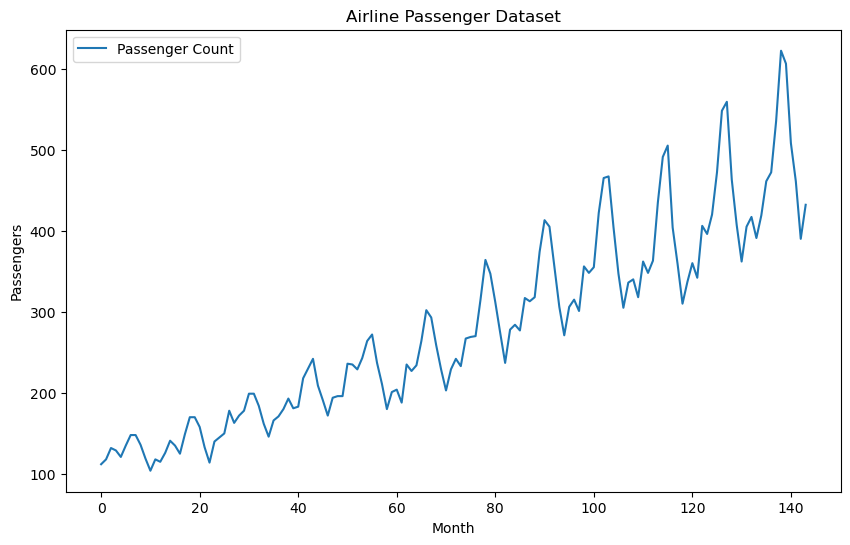

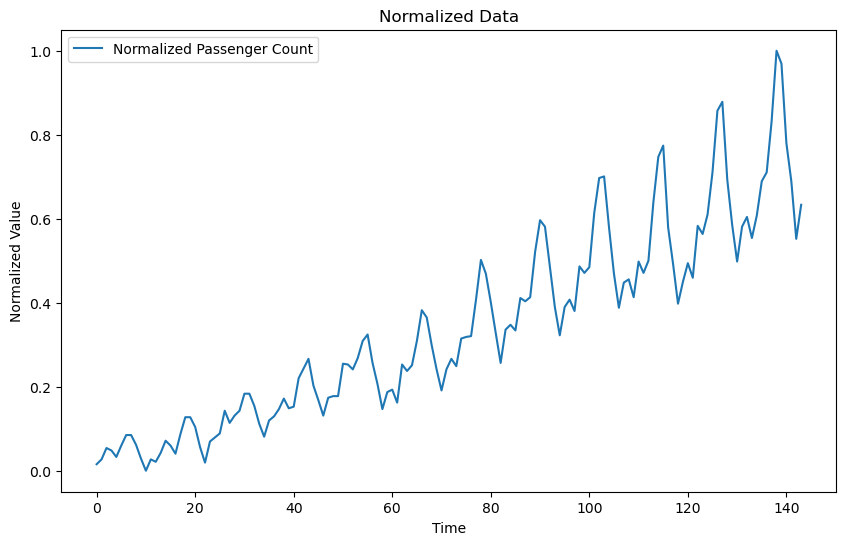

Train samples: 96, Test samples: 48


In [ ]:
# Main workflow
file_path = 'airline-passengers.csv'
df = load_dataset(file_path)
dataset = df.values

# Normalize dataset
scaled_data, scaler = normalize_data(dataset)

# Split dataset into train and test
train_data, test_data = split_data(scaled_data)

# Create lagged datasets for training and testing
look_back = 3  # Changed to 3 for capturing more temporal patterns
trainX, trainY = create_lagged_dataset(train_data, look_back)
testX, testY = create_lagged_dataset(test_data, look_back)


In [ ]:
# Reshape datasets to fit LSTM input
trainX = reshape_lstm_input(trainX)
testX = reshape_lstm_input(testX)

# Build and train the LSTM model
model = build_lstm_model((1, look_back))
history = model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
train_pred = model.predict(trainX)
test_pred = model.predict(testX)

# Inverse transform the predictions
train_pred = scaler.inverse_transform(train_pred)
trainY_inv = scaler.inverse_transform([trainY])
test_pred = scaler.inverse_transform(test_pred)
testY_inv = scaler.inverse_transform([testY])

# Calculate RMSE
train_rmse = math.sqrt(mean_squared_error(trainY_inv[0], train_pred[:, 0]))
test_rmse = math.sqrt(mean_squared_error(testY_inv[0], test_pred[:, 0]))
print(f'Train RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')


Epoch 1/100


C:\Users\Mitra   Nouri\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 - 1s - 13ms/step - loss: 0.0372
Epoch 2/100
92/92 - 0s - 740us/step - loss: 0.0159
Epoch 3/100
92/92 - 0s - 560us/step - loss: 0.0113
Epoch 4/100
92/92 - 0s - 703us/step - loss: 0.0100
Epoch 5/100
92/92 - 0s - 634us/step - loss: 0.0088
Epoch 6/100
92/92 - 0s - 624us/step - loss: 0.0078
Epoch 7/100
92/92 - 0s - 698us/step - loss: 0.0069
Epoch 8/100
92/92 - 0s - 638us/step - loss: 0.0061
Epoch 9/100
92/92 - 0s - 613us/step - loss: 0.0055
Epoch 10/100
92/92 - 0s - 679us/step - loss: 0.0053
Epoch 11/100
92/92 - 0s - 634us/step - loss: 0.0049
Epoch 12/100
92/92 - 0s - 648us/step - loss: 0.0048
Epoch 13/100
92/92 - 0s - 652us/step - loss: 0.0045
Epoch 14/100
92/92 - 0s - 605us/step - loss: 0.0044
Epoch 15/100
92/92 - 0s - 707us/step - loss: 0.0043
Epoch 16/100
92/92 - 0s - 549us/step - loss: 0.0043
Epoch 17/100
92/92 - 0s - 617us/step - loss: 0.0042
Epoch 18/100
92/92 - 0s - 684us/step - loss: 0.0041
Epoch 19/100
92/92 - 0s - 560us/step - loss: 0.0041
Epoch 20/100
92/92 - 0s - 713us/st

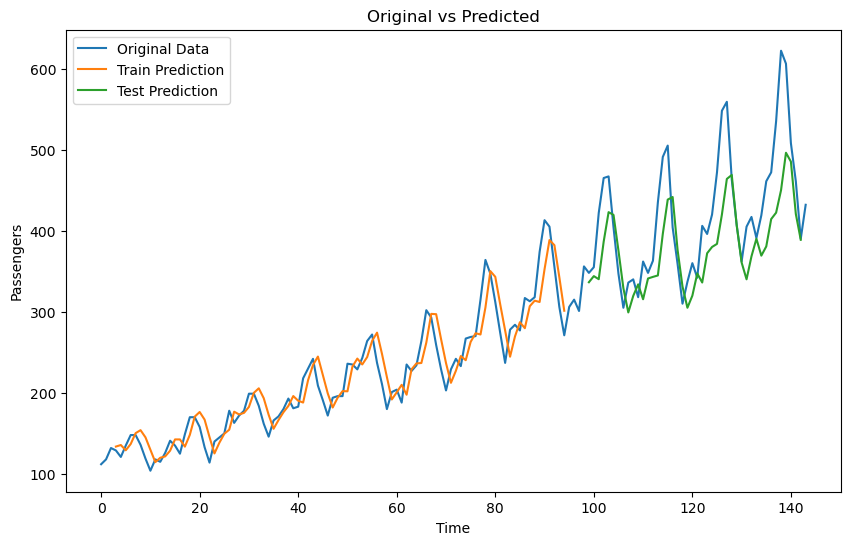

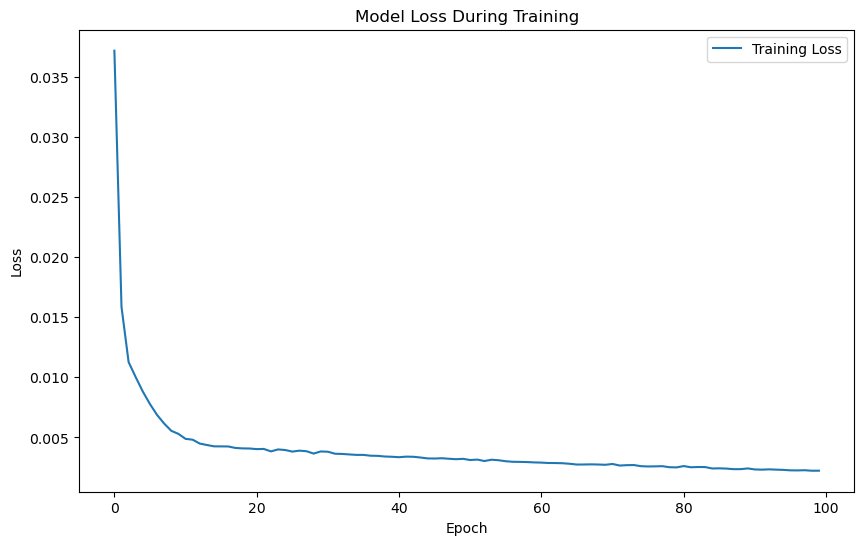

In [ ]:
# Plot predictions vs actual data
plot_predictions(scaled_data, train_pred, test_pred, look_back, scaler)

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()